# Cloning Quasars

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

Upsample the distribution with both rejection sampling and transform sampling

## Rejection Sampling

/var/folders/hz/p6990d5s151fqhq0n07rh8sm0000gn/T/ipykernel_94263/217224761.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  indexes_good = (upsampled_y == good_y)


False


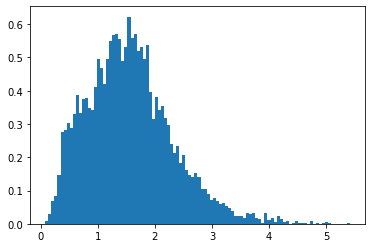

In [123]:
bins = 100
tries = 10000

uniform_x = stats.uniform(np.min(z), np.max(z))
uniform_y = stats.uniform(0, 1)

x = plt.hist(z, bins, density=True)

#Reshaping arrays so that they have the same dimension
pdf_baseline = x[0][:bins]              #PDF
bin_baseline = x[1][:bins]              #Binning

#Upsampling from uniform distributions "boxing" the histogram
upsampled_x = uniform_x.rvs(tries)
upsampled_y = uniform_y.rvs(tries)

x_indexes = np.digitize(upsampled_x, bin_baseline)   #Getting the positional indexes to locate new x-drawn data from the histogram binnings

reference_y = pdf_baseline[(x_indexes-1)]

good_y = upsampled_y[upsampled_y <= reference_y]
bad_y = upsampled_y[upsampled_y > reference_y]

indexes_good = (upsampled_y == good_y)


print(indexes_good)



#print(y_mask)
#print(len(y_mask))



## Inverse Transform Sampling

In [2]:
import astropy
astropy.cosmology.Planck15

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

# Gerry's implementation

In [130]:
import numpy as np
import scipy.stats
import astropy
import matplotlib.pyplot as plt

In [132]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
quasars = fetch_dr7_quasar()

# select the first 10000 points
quasars = quasars[:10000]

z = quasars['redshift']

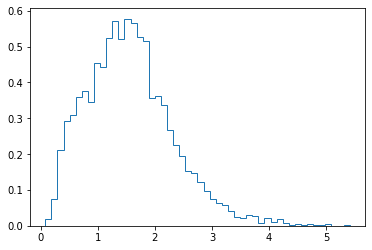

In [133]:
plt.hist(z,bins=50,histtype='step',density=True,label='original data');

In [134]:
np.histogram(z, bins=100,density=True)

(array([0.00750005, 0.03000019, 0.06750042, 0.08437555, 0.14812589,
        0.2756268 , 0.28312669, 0.30375182, 0.28875189, 0.33000216,
        0.38812754, 0.3318768 , 0.37500245, 0.37687747, 0.34875228,
        0.34125223, 0.41062723, 0.49687881, 0.46687753, 0.42000228,
        0.49687881, 0.54937798, 0.56812808, 0.57187938, 0.55500301,
        0.48937875, 0.53250289, 0.62250338, 0.55875428, 0.57000309,
        0.51937898, 0.53250289, 0.4968777 , 0.53625411, 0.39562715,
        0.31500241, 0.38062706, 0.34125185, 0.35437692, 0.31875173,
        0.29625293, 0.2400013 , 0.21375116, 0.23437627, 0.183751  ,
        0.20812706, 0.16125087, 0.14625079, 0.14062576, 0.15375083,
        0.14062639, 0.10500057, 0.10500057, 0.09000049, 0.07125039,
        0.07687576, 0.06750037, 0.05812532, 0.06375035, 0.05437529,
        0.04687546, 0.0375002 , 0.02250012, 0.02437513, 0.02437513,
        0.01687509, 0.03187532, 0.02812515, 0.03375018, 0.0187501 ,
        0.01500008, 0.00187502, 0.03187517, 0.01

### Rejection Sampling

[0.01875012 0.07593799 0.21187633 0.29343926 0.30937702 0.36000215
 0.37593996 0.34500226 0.45375297 0.44343991 0.52312842 0.57000373
 0.52219092 0.57750313 0.56437869 0.52594094 0.51656588 0.35531482
 0.36093946 0.33656433 0.26812705 0.22406372 0.195939   0.15375083
 0.1471883  0.12281344 0.09750053 0.07406307 0.06281284 0.05906282
 0.04218782 0.02343763 0.02062511 0.03000023 0.02625014 0.00843756
 0.02156267 0.01125006 0.0187501  0.00750004 0.00093751 0.00468753
 0.00187502 0.00468753 0.00093751 0.00187501 0.00375002 0.
 0.         0.00093751] [0.0802     0.186866   0.29353198 0.40019798 0.506864   0.61353
 0.720196   0.826862   0.93352795 1.0401939  1.14686    1.253526
 1.360192   1.4668579  1.573524   1.68019    1.7868559  1.8935219
 2.0001879  2.106854   2.21352    2.320186   2.426852   2.5335178
 2.640184   2.74685    2.8535159  2.960182   3.0668478  3.173514
 3.28018    3.3868458  3.493512   3.600178   3.7068439  3.81351
 3.9201758  4.0268416  4.1335077  4.240174   4.34684    4.

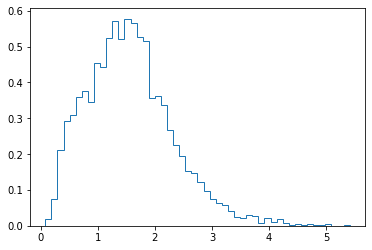

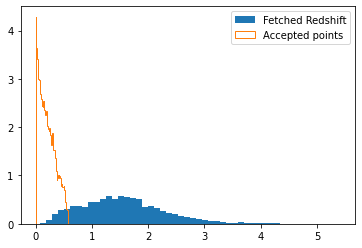

In [141]:



resolution = 50

plt.hist(z, resolution, density=True,label='Fetched Redshift');

# make a simple histogram object
density, bins = np.histogram(z, bins=resolution, density=True)




# Make a scipy.stats random variable object from a histogram
# This is a great hack!
disth = scipy.stats.rv_histogram((density, bins))


# Let's do it manually again
N = 100000 # trials
x_axis = np.random.uniform(0,5, N) # proposed points
y_axis = np.random.uniform(0, 1, N) # uniform draws

mask_good = y_axis <= disth.pdf(x_axis) # assess whether u <= q(x_i)
mask_bad = y_axis > disth.pdf(x_axis)

#Evaluated points separating accepted from rejected with masks
good_points = y_axis[mask_good]
#bad_points = y_axis[mask_bad]

plt.hist(good_points, bins=resolution, density=True,histtype='step',label='Accepted points')
#plt.hist(bad_points, bins=resolution, density=True, histtype='step', label='Rejected points')

### But scipy has it already implemented 
#plt.hist(disth.rvs(N),bins=50,density=True,histtype='step',label='cloned data 2');

plt.legend()